**Breast cancer dataset**



* this project uses medical data to help predict whether a breast tumor is benign (non-cancerous) or malignant (cancerous).
The dataset contains measurements taken from images of breast tissue samples.
By analyzing these measurements with machine learning models, we can assist doctors in making faster and more accurate diagnoses.

Why it matters:
Early and accurate detection of breast cancer can save lives by allowing timely treatment






* Dataset Features (Summary)

The dataset contains 30 measurements of cell nuclei, grouped into:

Mean – average value

SE – variation

Worst – largest value


Main measurements: radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, fractal dimension.
  




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read Data**

In [ ]:
df = pd.read_csv('/content/Breast_cancer_dataset.csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,873357,B,13.01,22.22,82.01,526.4,0.06251,0.01938,0.001595,0.001852,...,14.000,29.02,88.18,608.8,0.08125,0.03432,0.007977,0.009259,0.2295,0.05843
1,875099,B,9.72,18.22,60.73,288.1,0.06950,0.02344,0.000000,0.000000,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.000000,0.000000,0.1909,0.06559
2,901034302,B,12.54,18.07,79.42,491.9,0.07436,0.02650,0.001194,0.005449,...,13.720,20.98,86.82,585.7,0.09293,0.04327,0.003581,0.016350,0.2233,0.05521
3,8910721,B,14.29,16.82,90.30,632.6,0.06429,0.02675,0.007250,0.006250,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.038660,0.033330,0.2458,0.06120
4,89346,B,9.00,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,...,9.699,20.07,60.90,285.5,0.09861,0.05232,0.014720,0.013890,0.2991,0.07804


In [5]:
df.shape

(569, 32)

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


**Check Data**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
# garbage value
for i in df.select_dtypes(include='object').columns:
  print(i)
  print(df[i].value_counts())
  print()

diagnosis
diagnosis
B    357
M    212
Name: count, dtype: int64



In [11]:
num_col=df.select_dtypes(include='number').columns
num_col

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [12]:
categorical_col=df.select_dtypes(include='object').columns
categorical_col

Index(['diagnosis'], dtype='object')

In [13]:
df.drop('id',inplace=True,axis=1)

In [14]:
num_col=df.select_dtypes(include='number').columns
num_col

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')



*   we have successfuly loaded the dataset and checked its structure to ensure it is ready for analysis .
*   This step helps us confirm that the data is complete, correctly formatted, and suitable for building the predictive model



**Visualization**

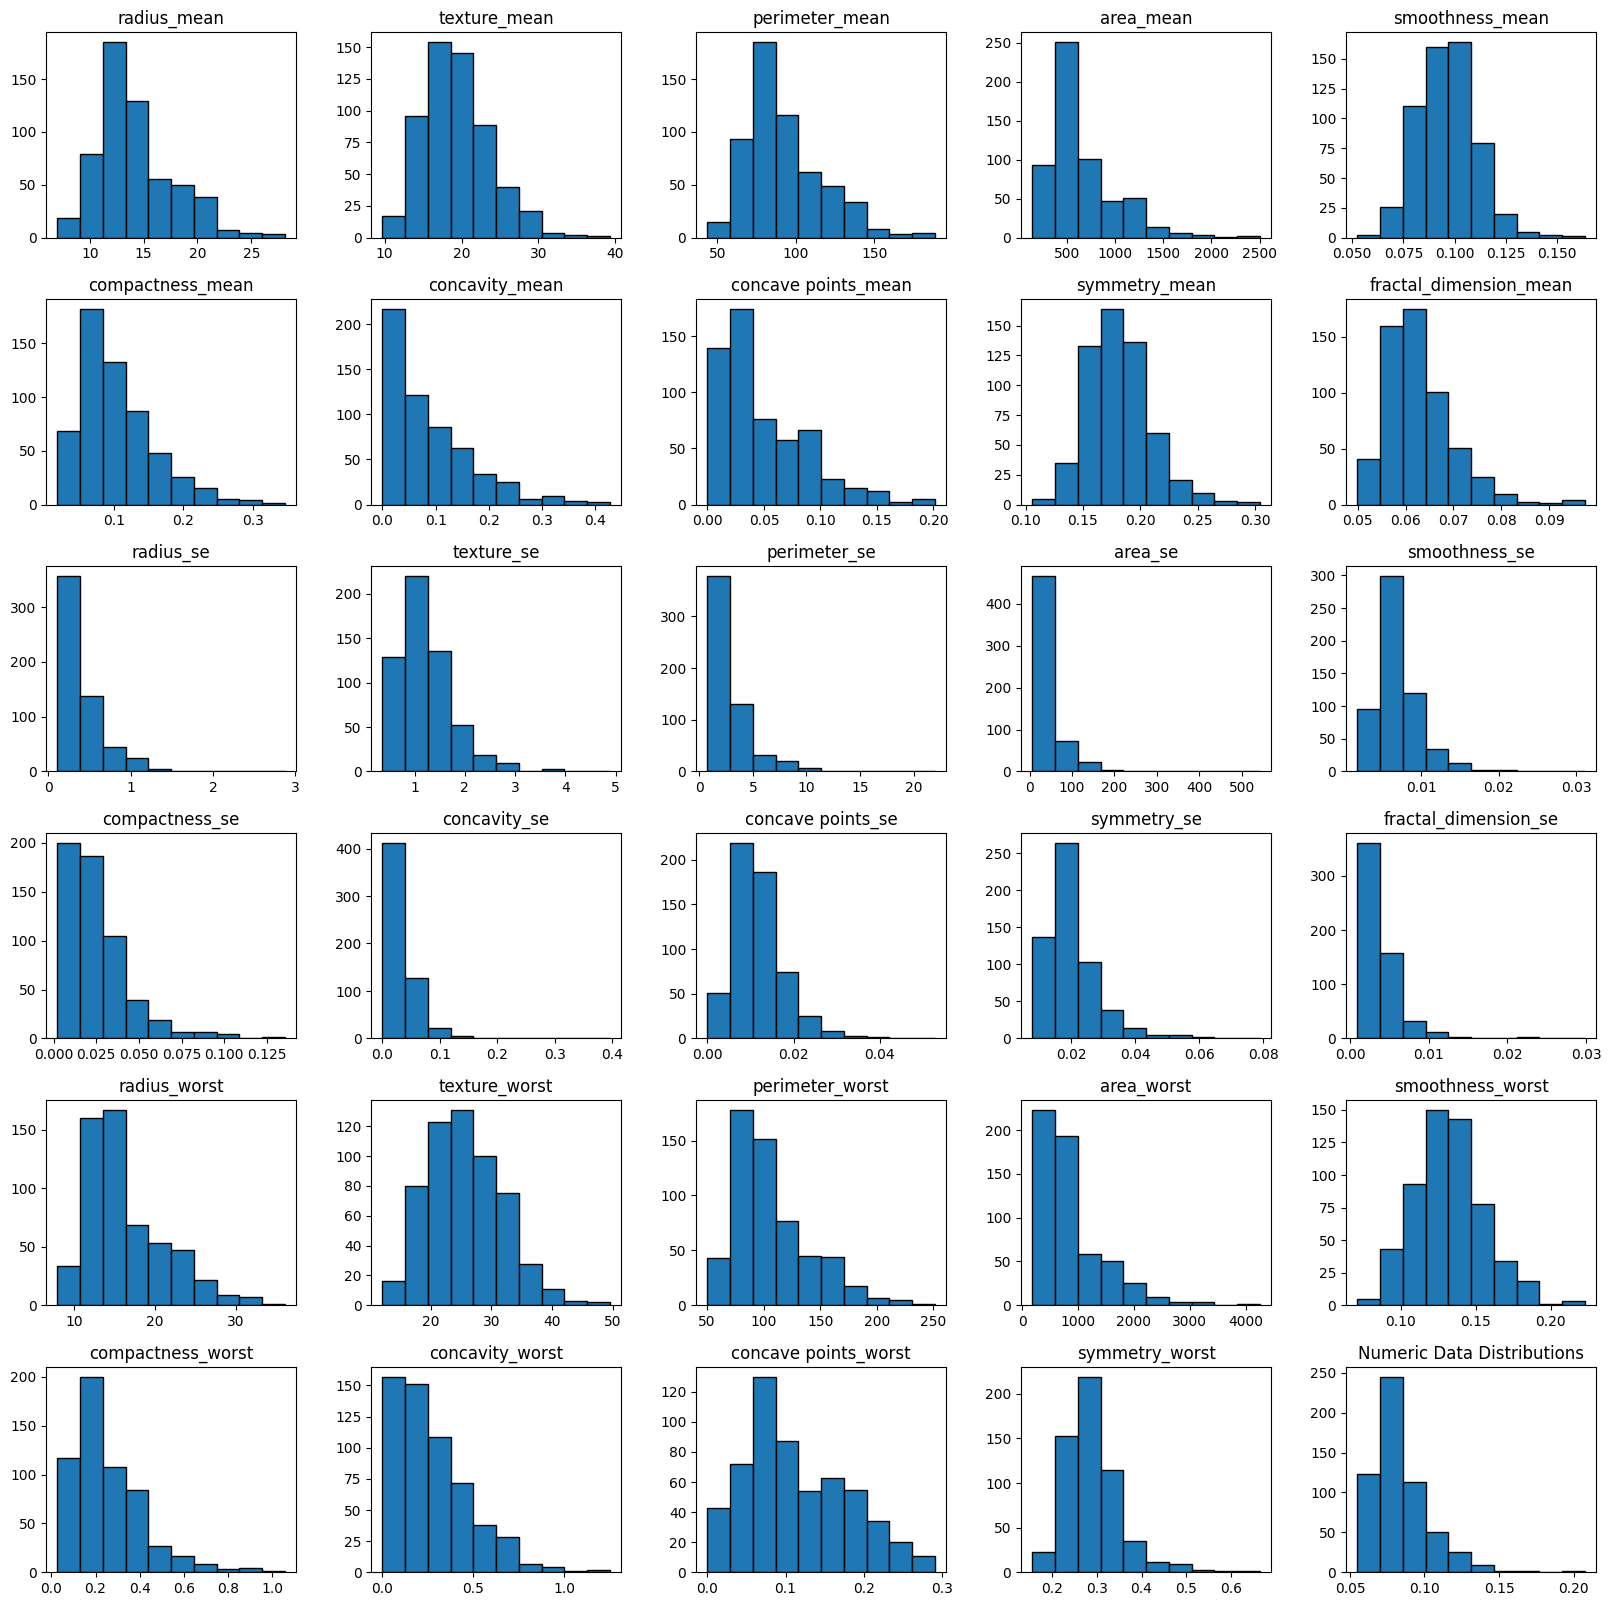

In [15]:
df[num_col].hist(figsize=(20,20),edgecolor='black',grid=False)
plt.title('Numeric Data Distributions')
plt.show()

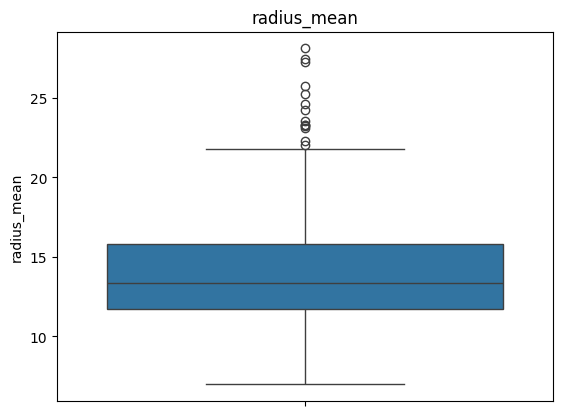

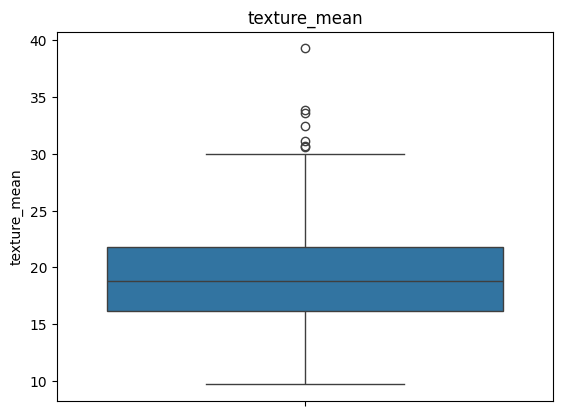

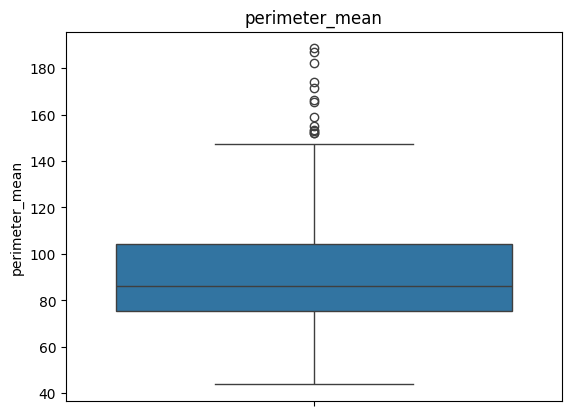

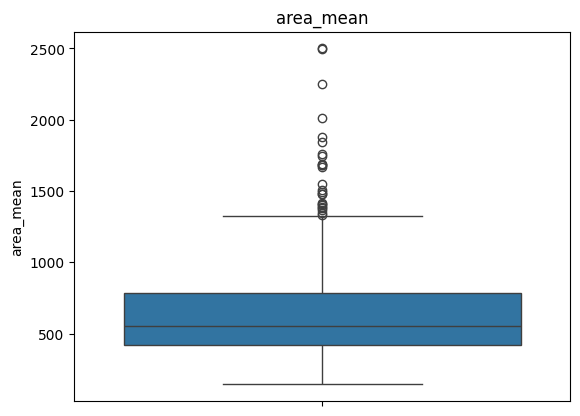

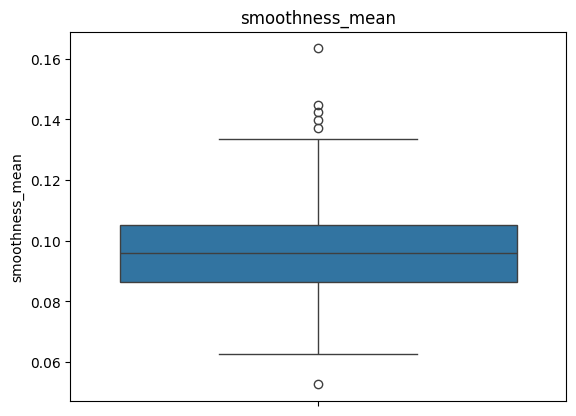

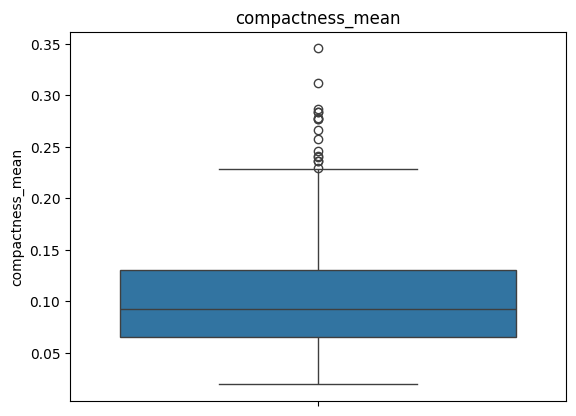

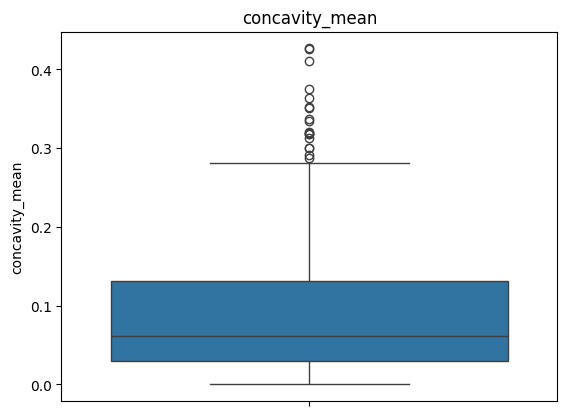

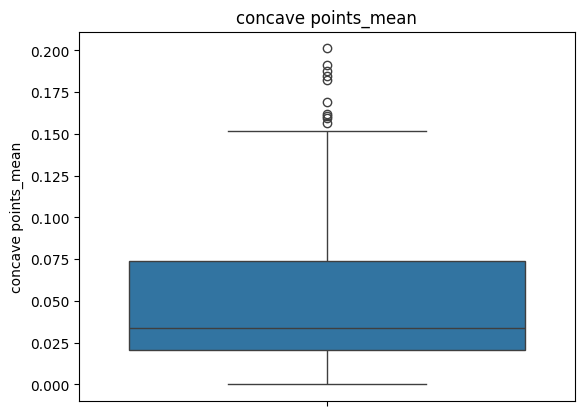

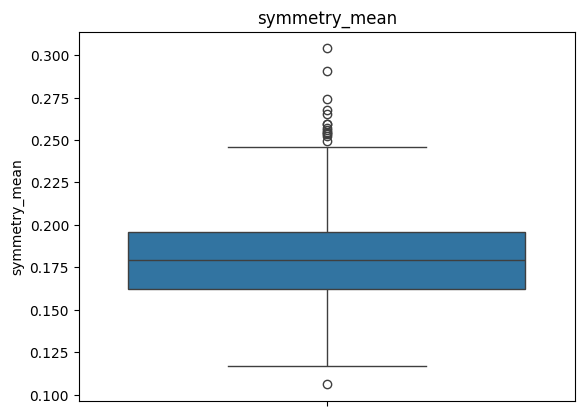

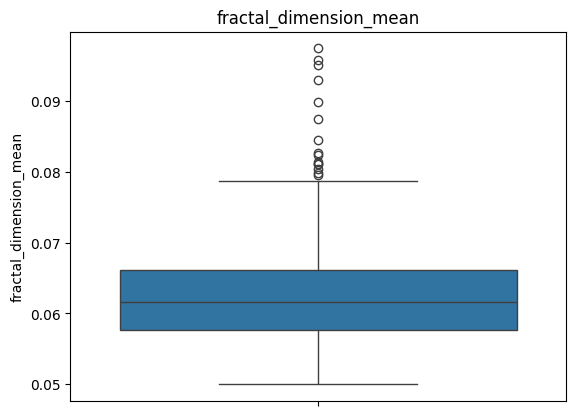

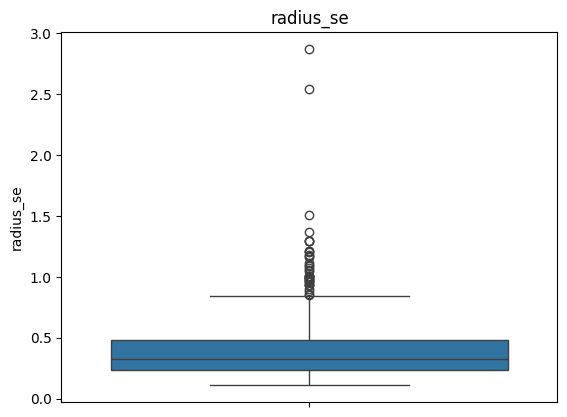

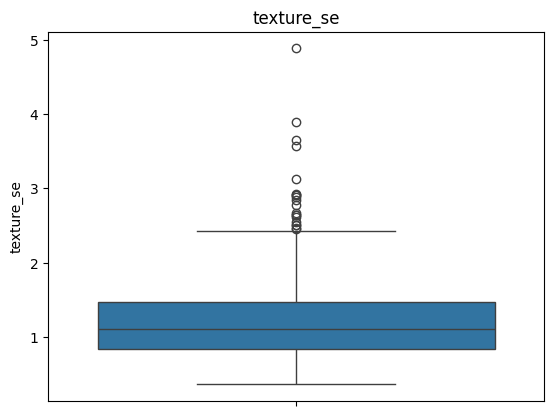

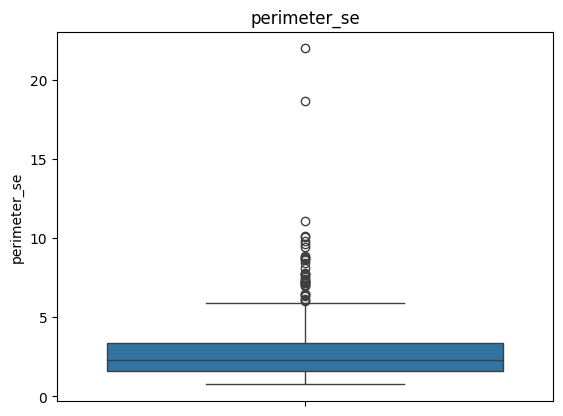

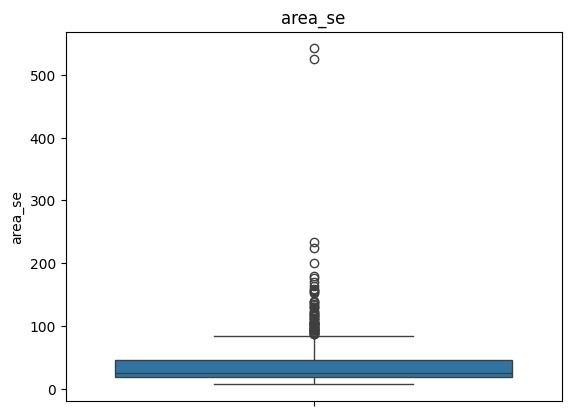

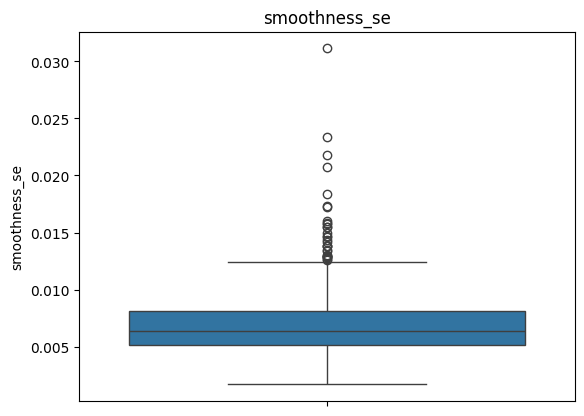

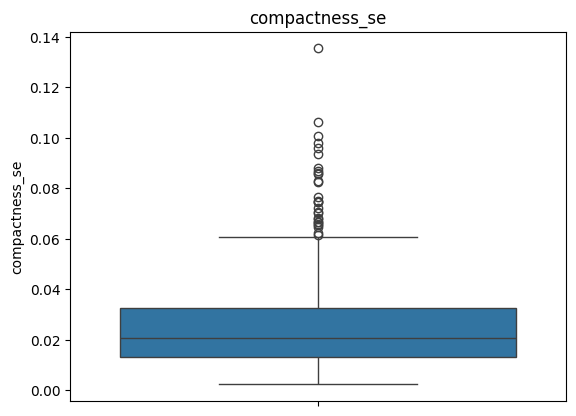

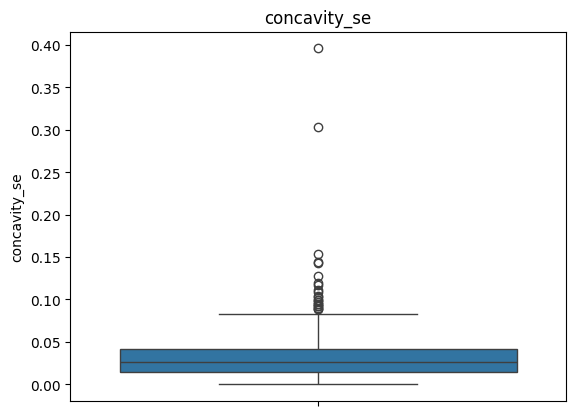

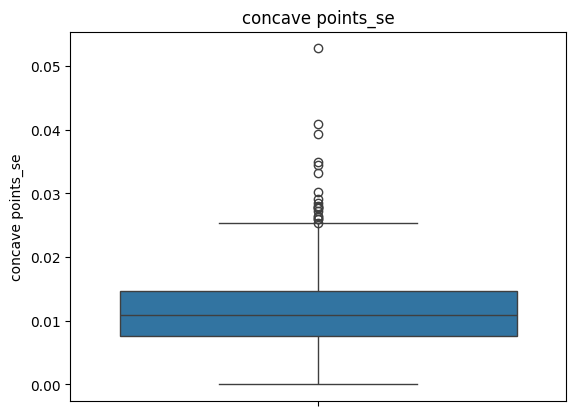

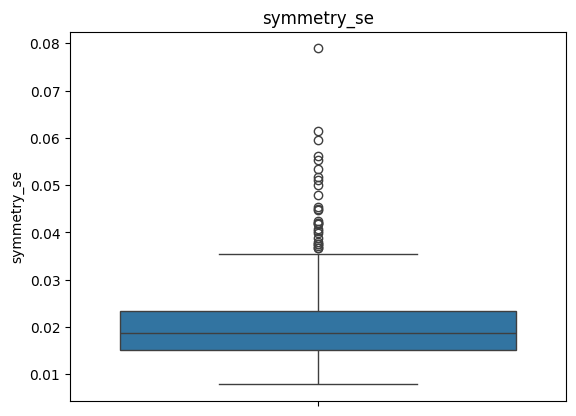

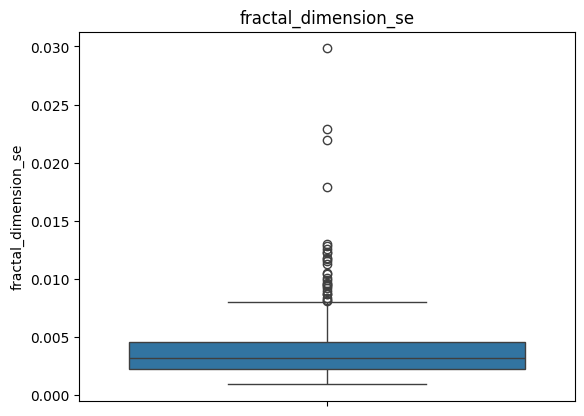

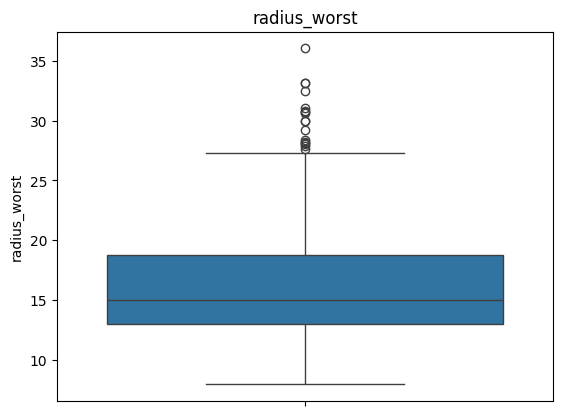

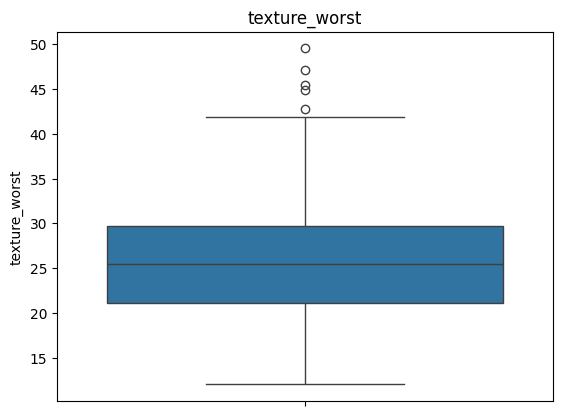

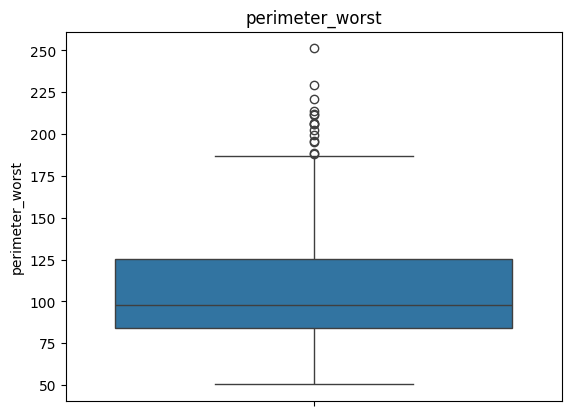

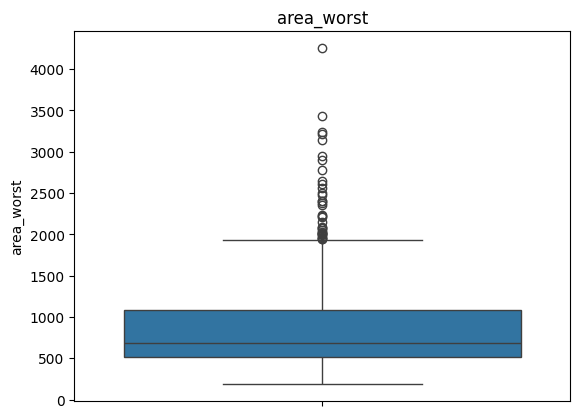

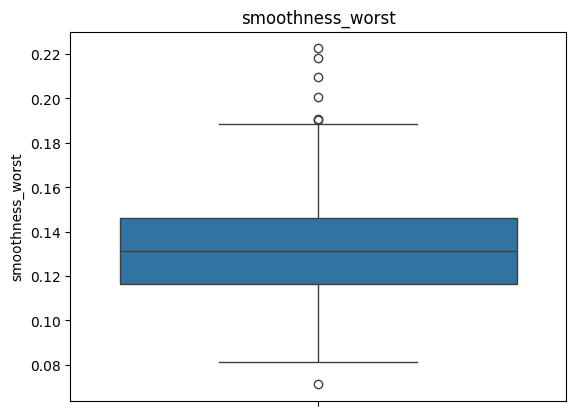

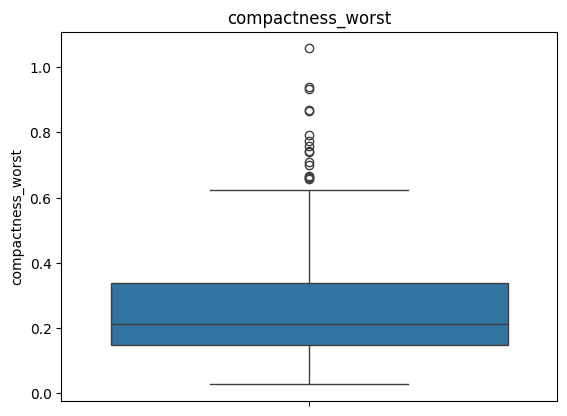

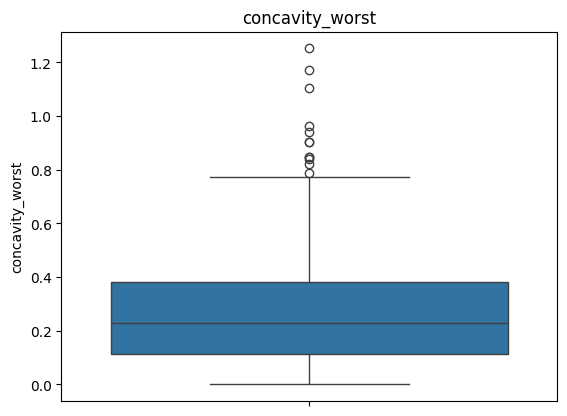

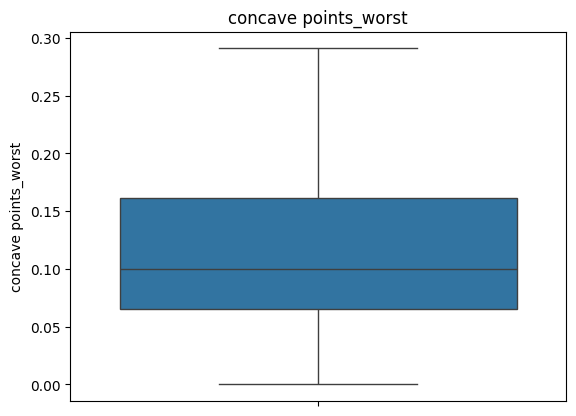

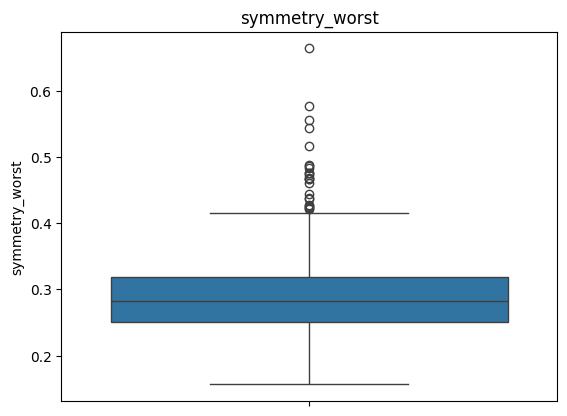

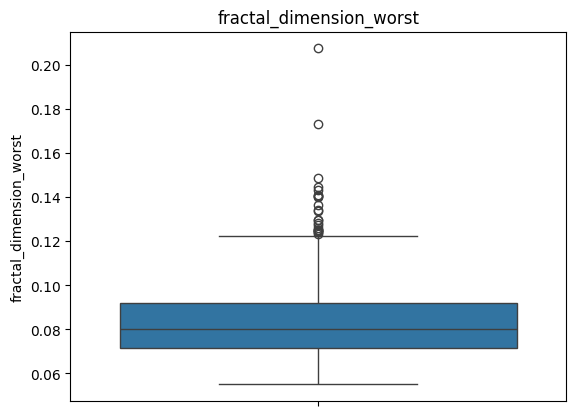

In [16]:
for i in  num_col:
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()

The boxplot shows data spread and some outliers, which will be handled in preprocessing

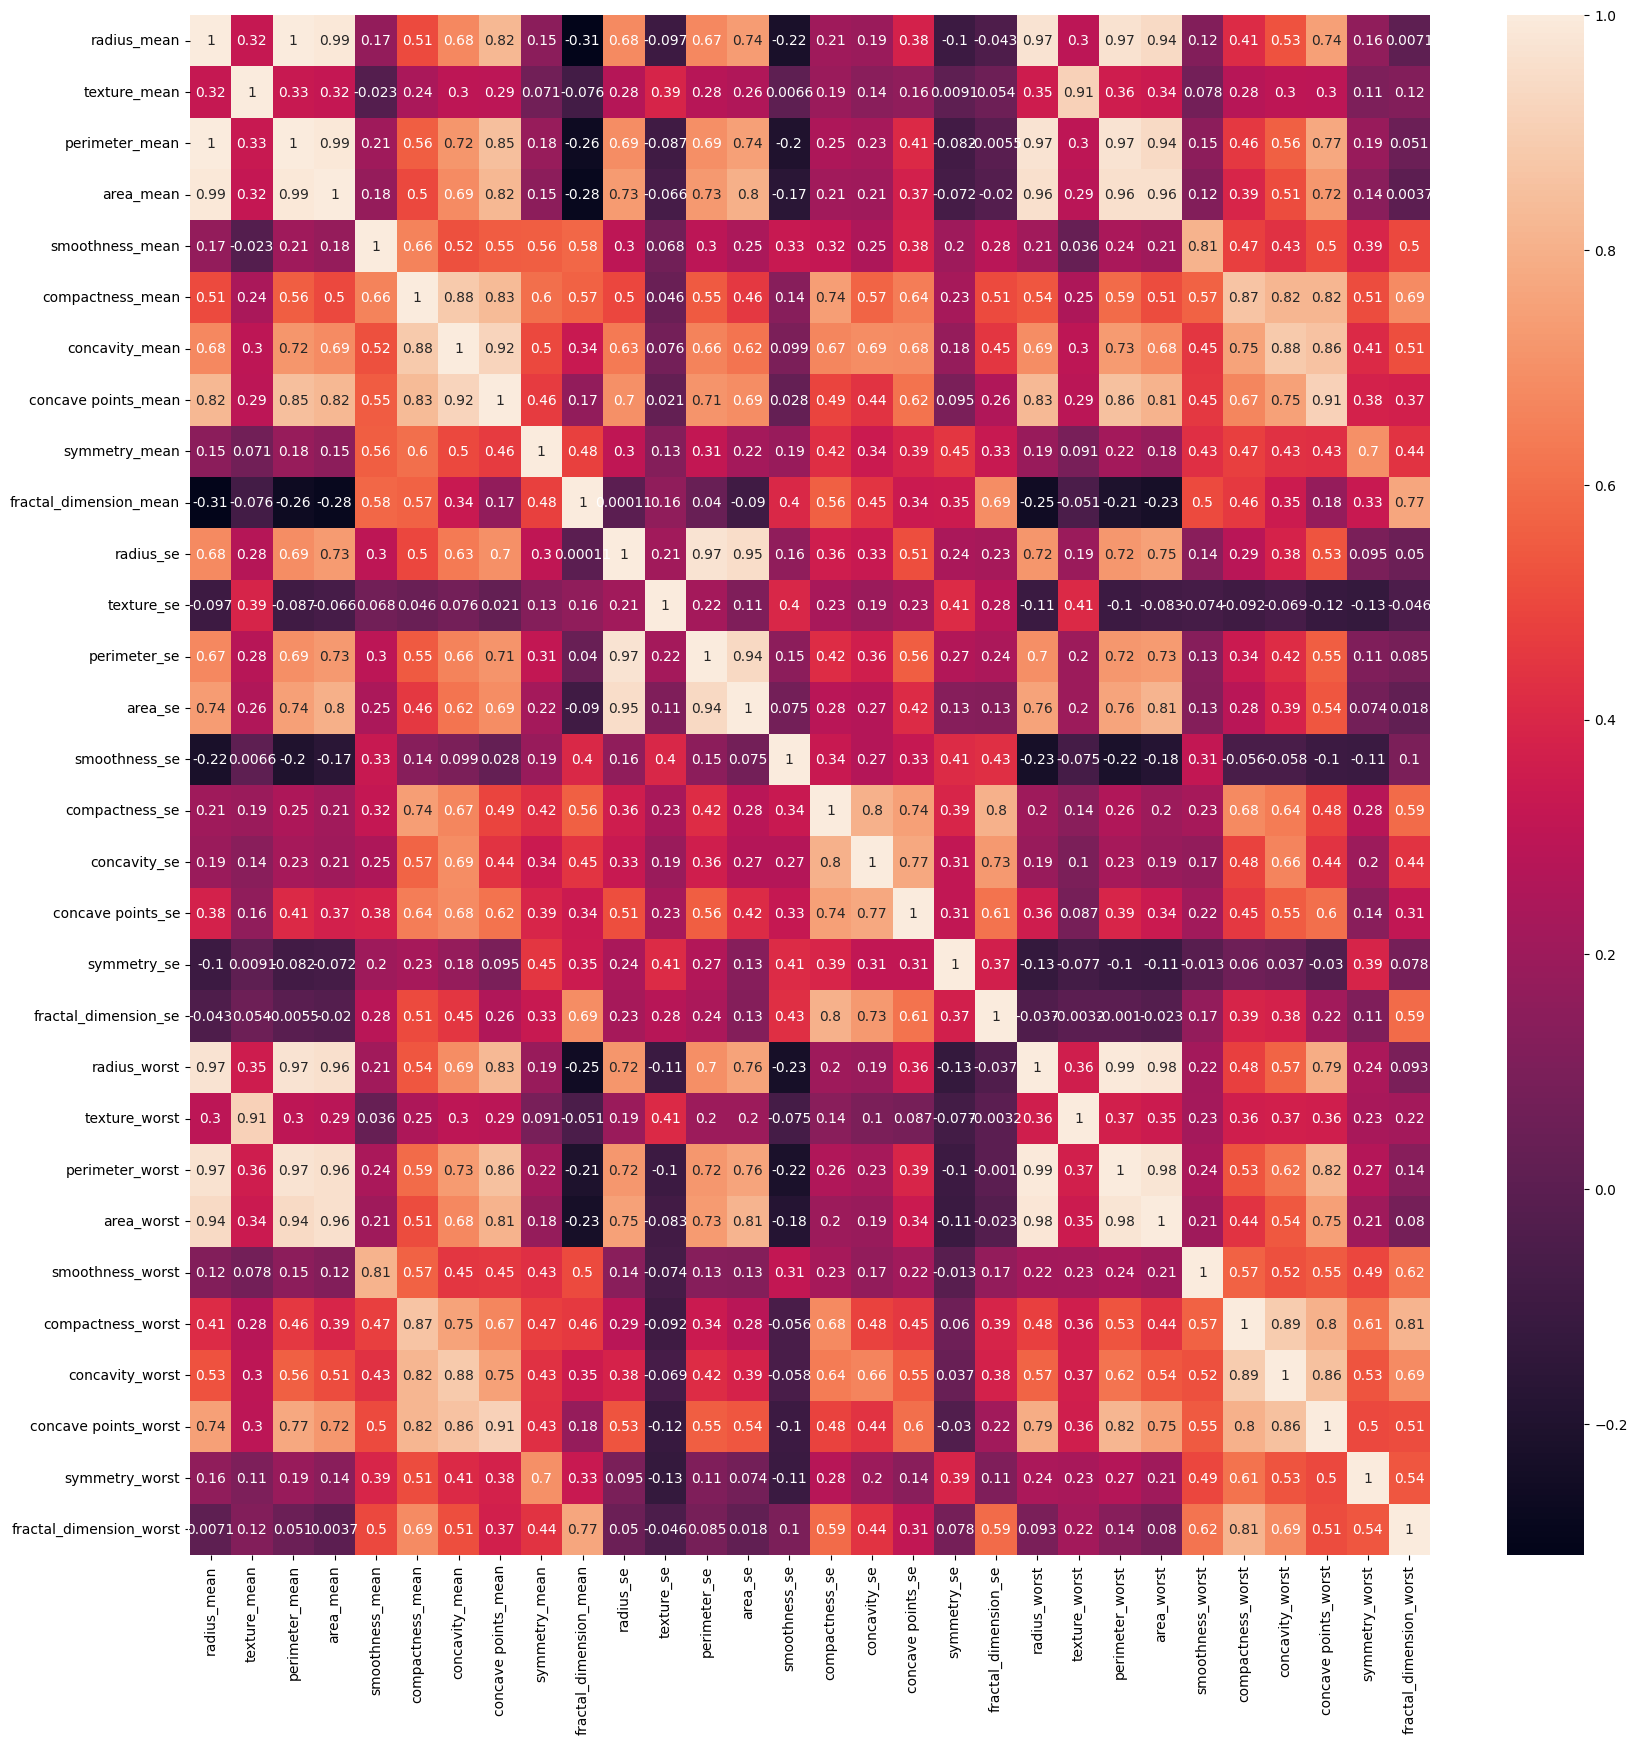

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(df[num_col].corr(),annot=True)
plt.show()

The heatmap shows that some featurs are highly corrected such as


*   radius_mean and perimeter_mean
*   radius_mean	and area_mean	/// perimeter_mean and 	area_mean


*   radius_worst and perimeter_worst /// radius_worst and area_worst	/// perimeter_worst and	area_worst






/tmp/ipython-input-3090882577.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['diagnosis'],data=df,palette={'M':'red','B':'skyblue'})


<Axes: xlabel='diagnosis', ylabel='count'>

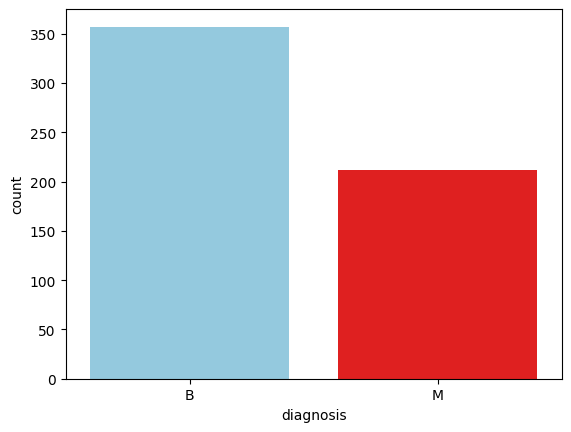

In [ ]:
sns.countplot(x=df['diagnosis'],data=df,palette={'M':'red','B':'skyblue'})


In [19]:
df["diagnosis"].value_counts()

,count
diagnosis,
B,357
M,212


**treatment the missing value & outliers**

In [20]:
df.drop( ['radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se'],axis=1,inplace=True)

Dropped all *_se columns because they are less informative than the corresponding mean and worst values

In [21]:
num_col=df.select_dtypes(include='number').columns
num_col

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [22]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,B,13.01,22.22,82.01,526.4,0.06251,0.01938,0.001595,0.001852,0.1395,...,14.000,29.02,88.18,608.8,0.08125,0.03432,0.007977,0.009259,0.2295,0.05843
1,B,9.72,18.22,60.73,288.1,0.06950,0.02344,0.000000,0.000000,0.1653,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.000000,0.000000,0.1909,0.06559
2,B,12.54,18.07,79.42,491.9,0.07436,0.02650,0.001194,0.005449,0.1528,...,13.720,20.98,86.82,585.7,0.09293,0.04327,0.003581,0.016350,0.2233,0.05521
3,B,14.29,16.82,90.30,632.6,0.06429,0.02675,0.007250,0.006250,0.1508,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.038660,0.033330,0.2458,0.06120
4,B,9.00,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,0.1788,...,9.699,20.07,60.90,285.5,0.09861,0.05232,0.014720,0.013890,0.2991,0.07804


In [23]:
df.shape

(569, 21)

In [24]:
for i in num_col:
  Q1 = df[i].quantile(.25)
  Q3 = df[i].quantile(.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR
  df = df[(df[i] >= lower)&(df[i] <= upper)]
df.shape

(371, 21)

In [25]:
for col in num_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower, upper=upper)  # Cap values outside range

print("Outliers have been capped using IQR method.")
df.shape


Outliers have been capped using IQR method.


(371, 21)

Outliers were detected and capped using the IQR method to reduce their impact on model performance

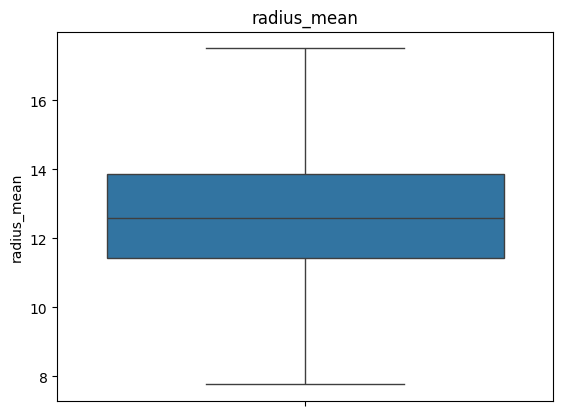

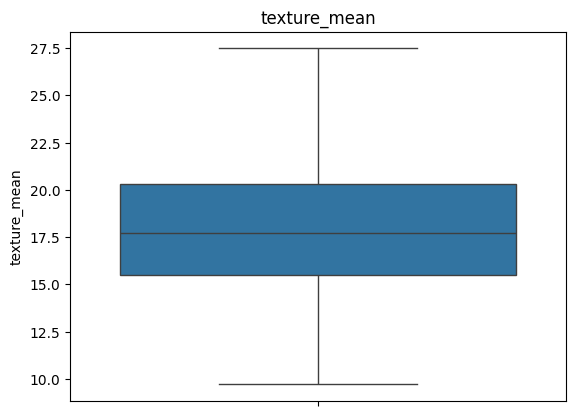

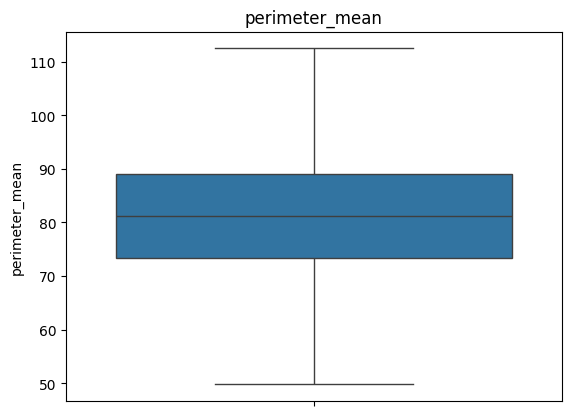

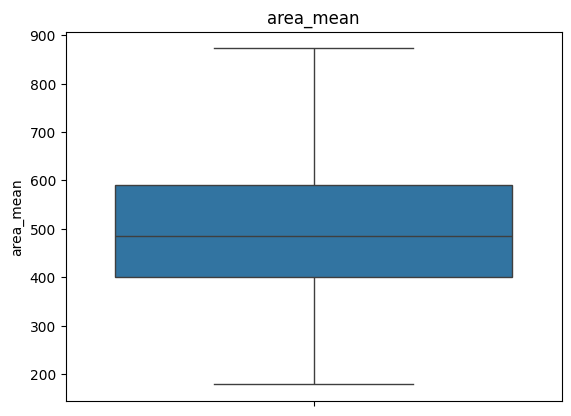

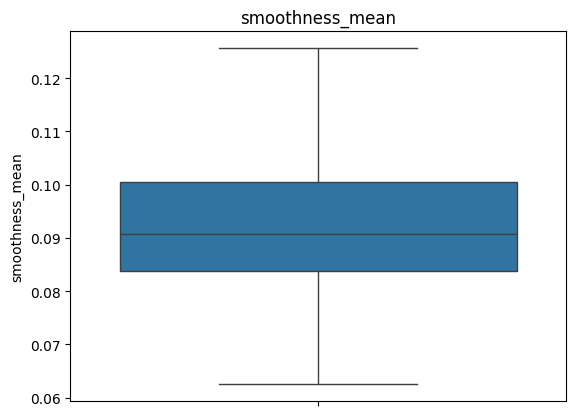

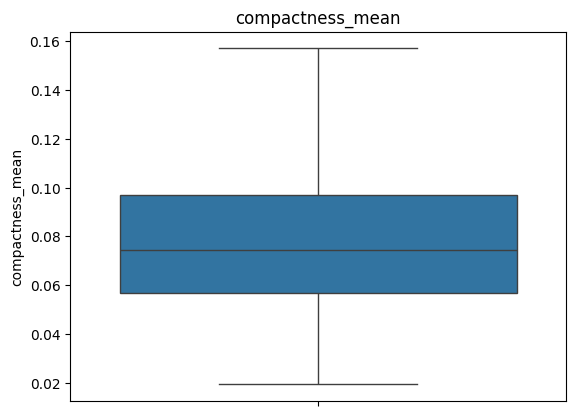

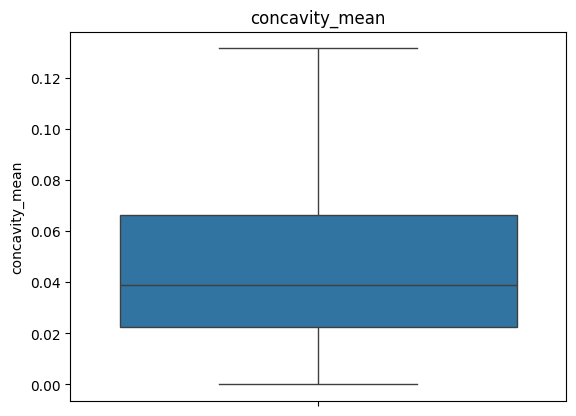

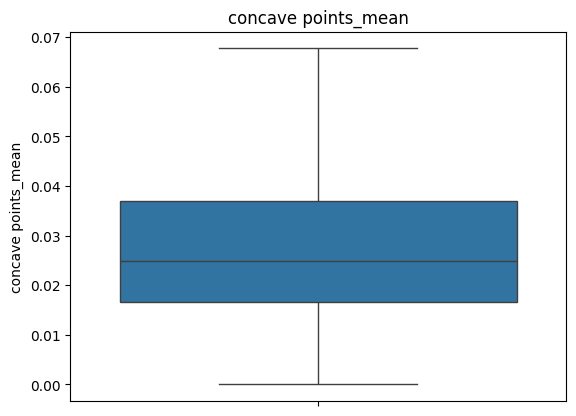

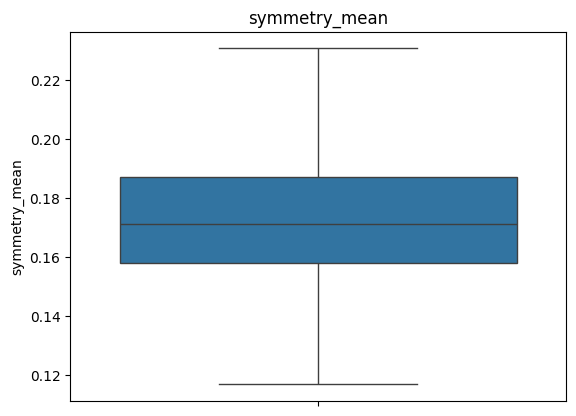

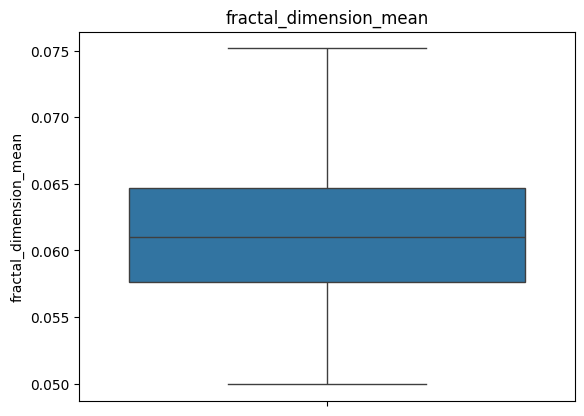

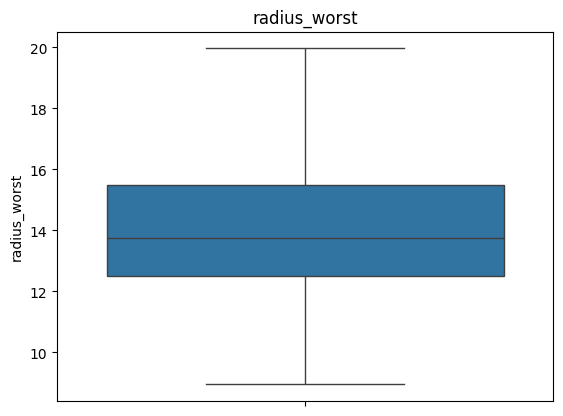

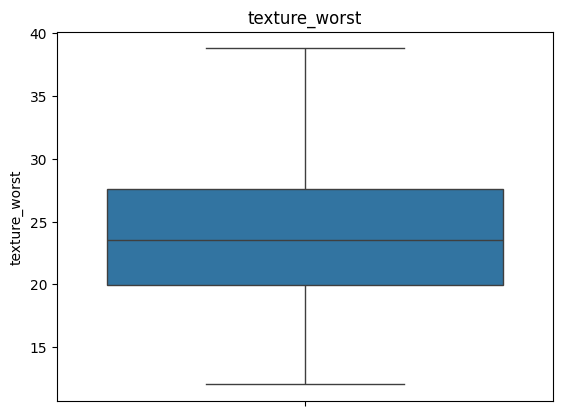

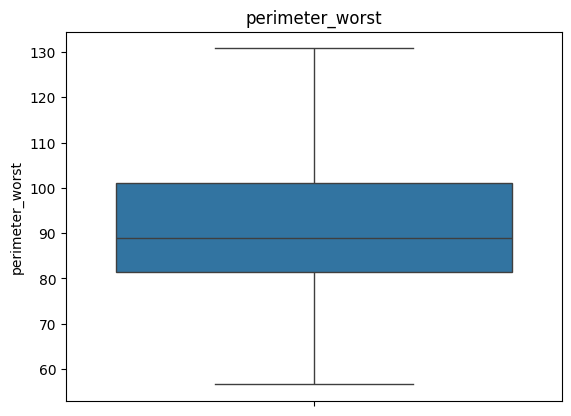

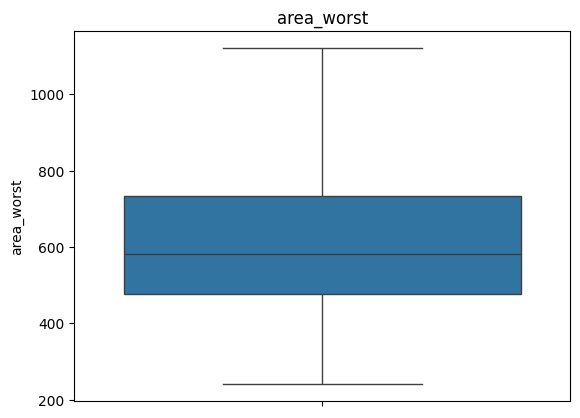

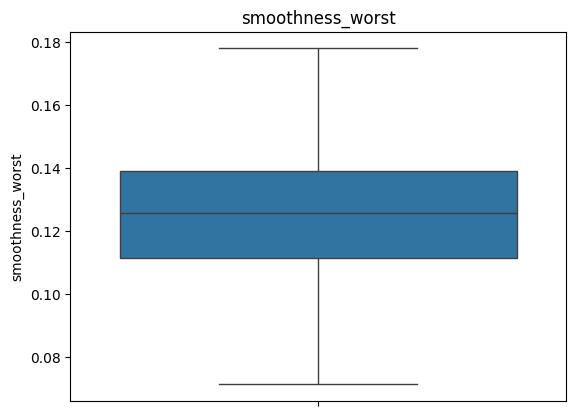

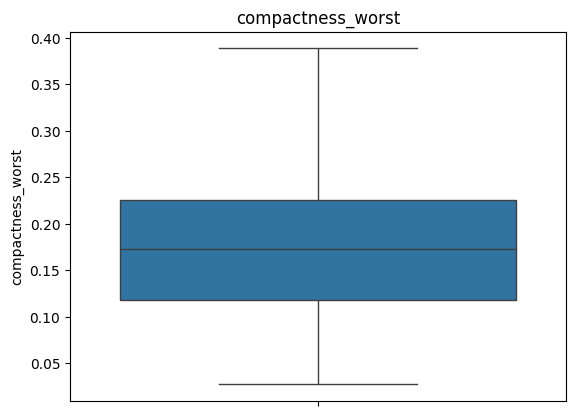

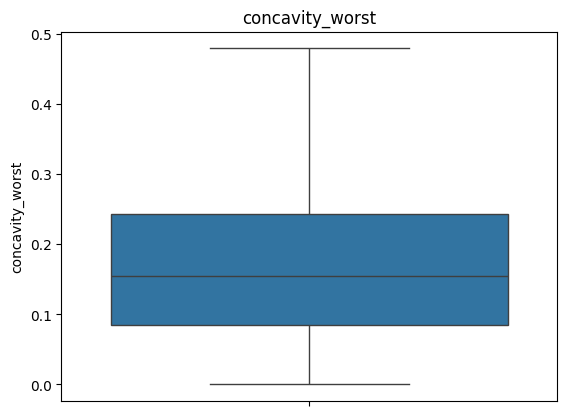

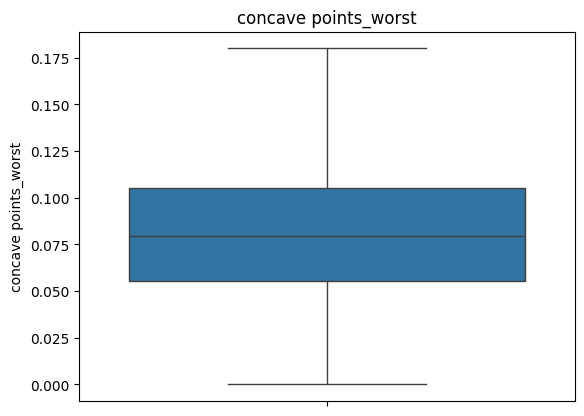

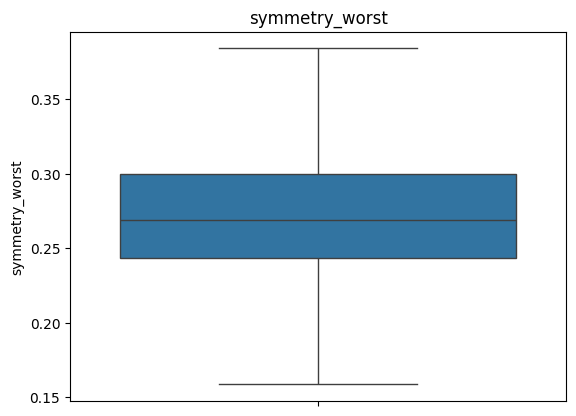

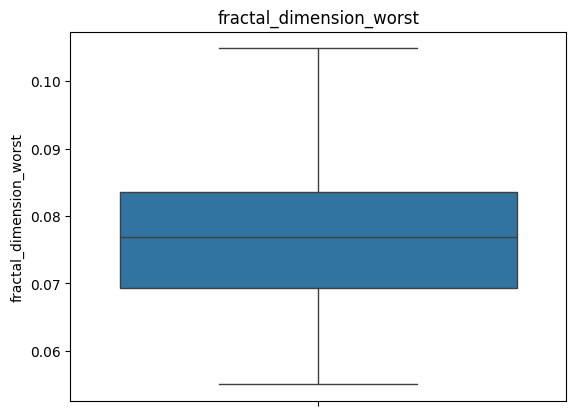

In [26]:
for i in num_col:
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()

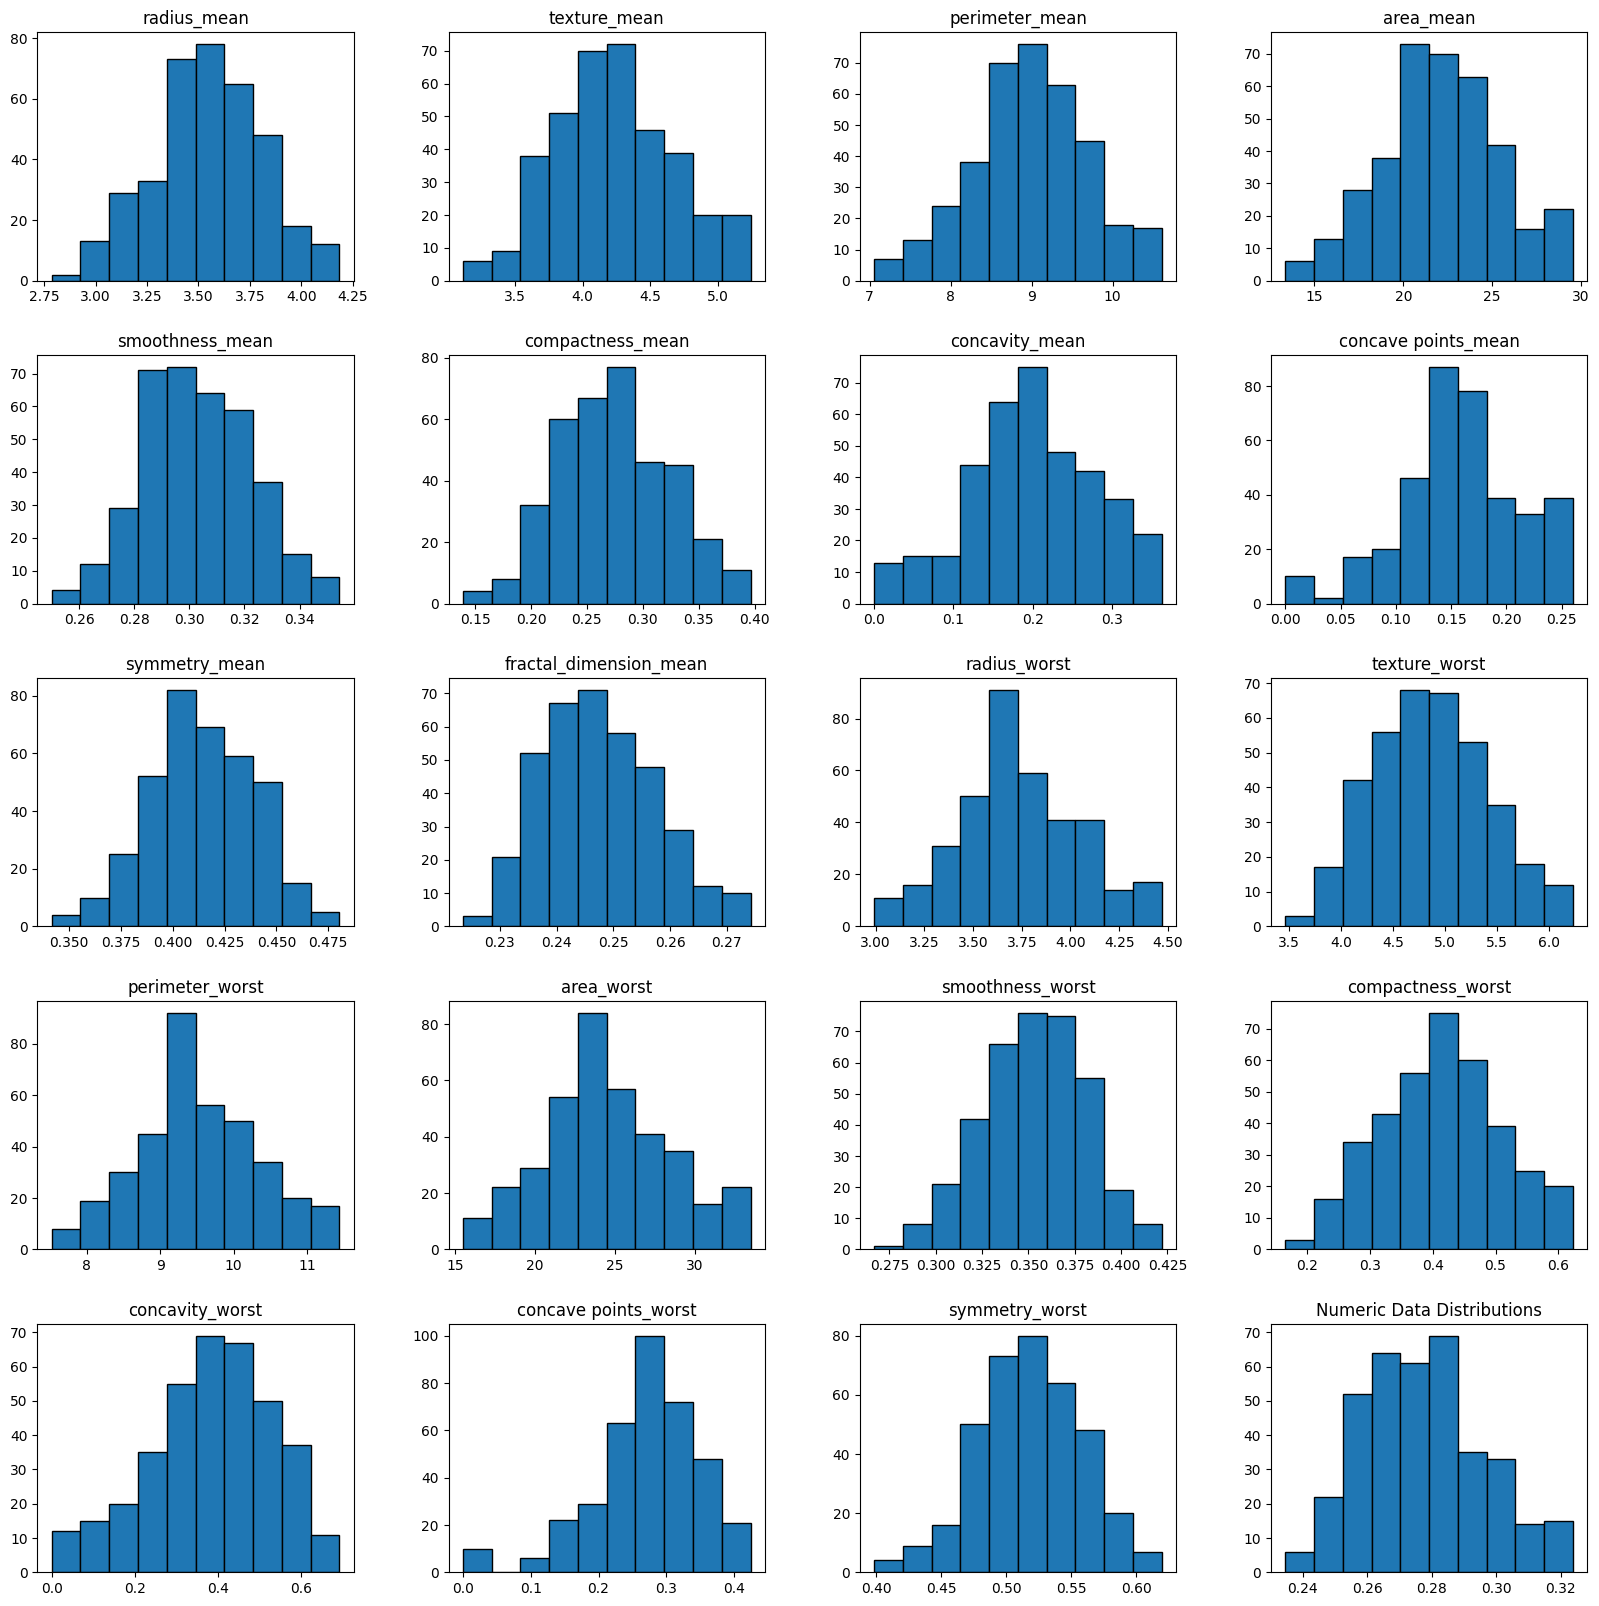

In [27]:
np.sqrt(df[num_col]).hist(figsize=(20,20),edgecolor='black',grid=False)
plt.title('Numeric Data Distributions')
plt.show()

Used square root transform since it improved data distribution well

**Diagnosis Analysis**

In [28]:
df.groupby('diagnosis')['radius_mean'].mean()

,radius_mean
diagnosis,
B,12.280645
M,15.153883


The average value of this feature is higher in malignant cases (15.1) than benign cases (12.2), indicating its importance in distinguishing between the two


In [29]:
df.groupby('diagnosis')['radius_worst'].mean()

,radius_worst
diagnosis,
B,13.520679
M,17.743191


The worst values show the maximum extent of each feature, which tends to be higher in malignant cases, making them valuable indicators for accurate classification

/tmp/ipython-input-978129511.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='diagnosis',y='radius_mean',data=df,palette={'M':'red','B':'skyblue'})


<Axes: xlabel='diagnosis', ylabel='radius_mean'>

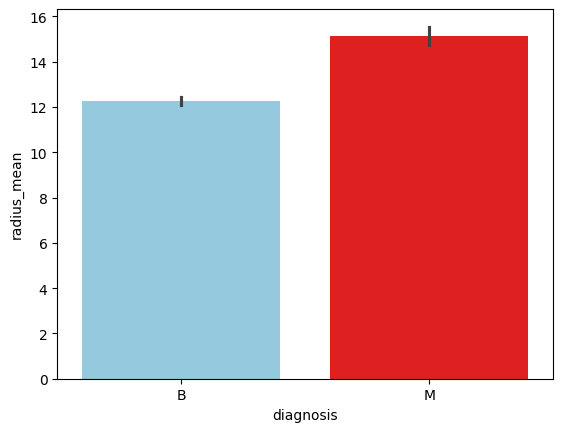

In [30]:
sns.barplot(x='diagnosis',y='radius_mean',data=df,palette={'M':'red','B':'skyblue'})


**Encoding**

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_col:
 df [i]=le.fit_transform(df[i])


**Train_Test Split**


*   Split the dataset into training and testing sets to evaluate the model’s performance on unseen data




In [32]:
x = df.drop('diagnosis',axis=1)
y = df['diagnosis']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

**ML Model**

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
print ('train score:',model.score(x_train,y_train))
print ('Accuracy:',model.score(x_test,y_test))



train score: 0.9391891891891891
Accuracy: 0.92


In [35]:
from sklearn import metrics
print('mean squre error:{:.2f}'.format(metrics.mean_squared_error(y_test,y_pred)))
print('mean absolute error:{:.2f}'.format(metrics.mean_absolute_error(y_test,y_pred)))
print('root mean squre error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))

mean squre error:0.08
mean absolute error:0.08
root mean squre error:0.28


We applied a machine learning technique called Support Vector Machine to breast cancer diagnosis data. The model correctly identified cases with 92% accuracy, which means it can be a reliable tool to assist doctors in making faster and more accurate decisions


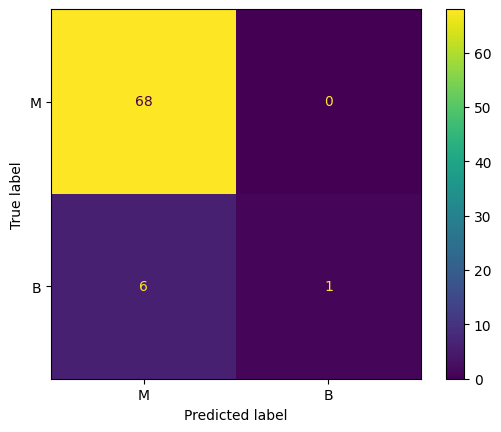

In [36]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)
disa = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['M','B'])
disa.plot()
plt.show()


The model achieved 0 false negatives, meaning it did not miss any actual cancer cases in the test data. This is critical in healthcare, as it ensures that no patient with cancer is incorrectly classified as healthy.
